In [1]:
import perceval as pcvl
import sympy as sp
import numpy as np
from perceval.components import BS
from perceval.algorithm import Sampler

In [2]:
source = pcvl.Source() 
QPU = pcvl.Processor("Naive",2,source)
R = 0.0
QPU.add(0, pcvl.BS(BS.r_to_theta(R)))

pcvl.pdisplay(QPU, recursive = True)

states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(QPU, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

# Gives the source distribution
QPU.with_input(pcvl.BasicState([1, 0]))
pcvl.pdisplay(QPU.source_distribution, precision=1e-4)

# Gives the output distribution
output_distribution=QPU.probs()["results"]
pcvl.pdisplay(output_distribution, max_v=10)

,0,1
0,0,1
1,1,0


state,probability
"|1,0>",1


state,probability
"|0,1>",1


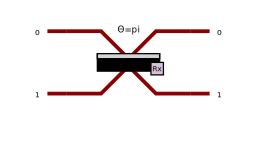

In [3]:
R = 0.0
circuit = pcvl.Circuit(2) 
circuit.add((0,1), pcvl.BS(BS.r_to_theta(R)))
pcvl.pdisplay(circuit)


In [4]:
p = pcvl.Processor("Naive", circuit)
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

,0,1
0,0,1
1,1,0


In [5]:
pcvl.pdisplay(circuit.compute_unitary())

In [6]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate


In [7]:
gate = UnitaryGate(circuit.compute_unitary())

circuit1 = QuantumCircuit(1,1)
circuit1.append(gate, [0])
circuit1.measure(0,0)
circuit1.draw()

┌─────────┐┌─┐
  q: ┤ Unitary ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

In [8]:
from qiskit import Aer
from qiskit import *

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circuit1, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(circuit1)
print(counts)

{'1': 1024}


<h3> With Error in reflectivity - Error of 0.01%</h3>

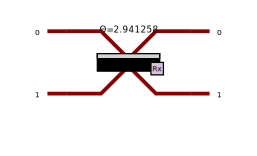

In [9]:
R = 0.01
circuit = pcvl.Circuit(2) 
circuit.add((0,1), pcvl.BS(BS.r_to_theta(R)))
pcvl.pdisplay(circuit)


In [10]:
p = pcvl.Processor("Naive", circuit)
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

,0,1
0,0.01,0.99
1,0.99,0.01


In [11]:
pcvl.pdisplay(circuit.compute_unitary())

In [12]:
gate = UnitaryGate(circuit.compute_unitary())

circuit1 = QuantumCircuit(1,1)
circuit1.append(gate, [0])
circuit1.measure(0,0)
circuit1.draw()

┌─────────┐┌─┐
  q: ┤ Unitary ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0

In [13]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(circuit1, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(circuit1)
print(counts)

{'0': 10, '1': 1014}


In [ ]:
!pip install mitiq

In [16]:
from mitiq import zne
from mitiq.interface.mitiq_qiskit.qiskit_utils import initialized_depolarizing_noise

In [43]:

# Default to a simulator.
backend = qiskit.Aer.get_backend("qasm_simulator")


def ibmq_executor(circuit: qiskit.QuantumCircuit, shots: int = 8192) -> float:
        # Simulate the circuit with noise
        #noise_model = initialized_depolarizing_noise(noise_level=0.02)
    job = qiskit.execute(
        experiments=circuit,
        backend=qiskit.Aer.get_backend("qasm_simulator"),
        noise_model=None,
        #basis_gates=noise_model.basis_gates,
        optimization_level=0,  # Important to preserve folded gates.
        shots=shots,
    )

    # Convert from raw measurement counts to the expectation value
    counts = job.result().get_counts()
    #return counts
    if counts.get("1") is None:
        expectation_value = 0.
    else:
        expectation_value = counts.get("1") / shots
    return expectation_value

In [19]:
!pip install pylatexenc

  Using cached pylatexenc-2.10-py3-none-any.whl


In [22]:
from qiskit.compiler import transpile
#from qiskit.compiler.transpile import CouplingMap

#coupling_string = [[0, 1], [0,2], [1,2]]
#CM = CouplingMap(coupling_string)

result = transpile(circuit1, basis_gates=['id', 'ry', 'rx', 'cx'], optimization_level=3, seed_transpiler=1) 
result.draw()

┌─────────────┐┌─┐
  q: ┤ Rx(-2.9413) ├┤M├
     └─────────────┘└╥┘
c: 1/════════════════╩═
                     0

In [23]:
job_sim = backend_sim.run(result, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(result)
print(counts)

{'0': 10, '1': 1014}


In [40]:
circuit2 = QuantumCircuit(1,1)
circuit2.rx(-2.9413,0)
circuit2.measure(0,0)
circuit2.draw()

┌─────────────┐┌─┐
  q: ┤ Rx(-2.9413) ├┤M├
     └─────────────┘└╥┘
c: 1/════════════════╩═
                     0

In [41]:
job_sim = backend_sim.run(circuit2, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(circuit2)
print(counts)

{'0': 11, '1': 1013}


In [44]:
linear_factory = zne.inference.LinearFactory(scale_factors=[1.0, 1.5, 2.0, 2.5, 3.0])
mitigated = zne.execute_with_zne(circuit2, ibmq_executor, factory=linear_factory)
print(f"Mitigated result {mitigated:.3f}")

/home/jovyan/.local/lib/python3.9/site-packages/mitiq/zne/inference.py:107: UserWarning: The input circuit is very short. This may reduce the accuracy of noise scaling.
  warnings.warn(


Mitigated result 0.989


**Low Level Usage**

In [45]:
scale_factors = [1., 1.5, 2., 2.5, 3.]
folded_circuits = [
        zne.scaling.fold_gates_at_random(circuit2, scale)
        for scale in scale_factors
]

# Check that the circuit depth is (approximately) scaled as expected
for j, c in enumerate(folded_circuits):
    print(f"Number of gates of folded circuit {j} scaled by: {len(c) / len(circuit2):.3f}")

Number of gates of folded circuit 0 scaled by: 1.000
Number of gates of folded circuit 1 scaled by: 1.000
Number of gates of folded circuit 2 scaled by: 2.000
Number of gates of folded circuit 3 scaled by: 2.000
Number of gates of folded circuit 4 scaled by: 2.000


In [46]:
shots = 1024

job = qiskit.execute(
        experiments=folded_circuits,
        backend=qiskit.Aer.get_backend("qasm_simulator"),
        noise_model=None,
        #basis_gates=noise_model.basis_gates,
        optimization_level=0,  # Important to preserve folded gates.
        shots=shots,
    )

In [48]:
all_counts = [job.result().get_counts(i) for i in range(len(folded_circuits))]
expectation_values = [counts.get("0") / shots for counts in all_counts]
print(f"Expectation values:\n{expectation_values}")

expectation_values = [counts.get("1") / shots for counts in all_counts]
print(f"Expectation values:\n{expectation_values}")

Expectation values:
[0.0078125, 0.0126953125, 0.005859375, 0.0087890625, 0.0087890625]
Expectation values:
[0.9921875, 0.9873046875, 0.994140625, 0.9912109375, 0.9912109375]
